In [1]:
import Orange
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
import math

In [2]:
df = pd.read_csv("/Users/jeaniechen/Desktop/CMU_REU/Firmware/build/posix_sitl_default/tmp/rootfs/fs/microsd/log/missions_iter.csv")
df_reduced = df.drop(['Gravity_x', 'Gravity_y', 'Gravity_z', 
                     'Number of Engine Failures', 'Number of Mission Failures'], axis=1)
df_reduced.head(10)

,Sensor Noise Accelerometer,Sensor Noise Gyroscope,Sensor Noise Magnetometer,Sensor Noise Pressure,Rotor Orientation,Magnetic Field_x,Magnetic Field_y,Magnetic Field_z,Wind_x,Wind_y,Wind_z,Wind Deviation_x,Wind Deviation_y,Wind Deviation_z,Number of Iterations,Battery Consumption,Number of Ground Contacts
0,0.074,0.012,0.002,0.152,+,0.319,0.463,0.644,1.2,1.2,8.1,2.7,0.4,6.5,883,0.183809,1
1,0.044,0.050,0.001,0.726,+,0.180,0.421,0.198,16.7,11.5,14.0,2.8,1.7,2.7,155,0.251682,56
2,0.094,0.026,0.000,0.311,+,0.313,0.361,0.356,19.1,16.2,13.1,7.6,1.3,7.7,875,0.406481,62
3,0.078,0.090,0.009,0.575,+,0.016,0.638,0.083,1.2,6.0,15.5,3.9,7.1,6.0,855,0.181005,1
4,0.084,0.072,0.008,0.340,+,0.187,0.069,0.529,17.8,11.7,15.6,6.5,6.0,3.8,795,0.183809,2
5,0.099,0.065,0.008,0.181,x,0.063,0.223,0.201,14.9,15.3,16.7,8.3,5.8,8.3,837,0.404036,59
6,0.057,0.088,0.008,0.425,+,0.613,0.156,0.366,9.1,14.1,11.7,1.7,1.2,9.0,748,0.158793,1
7,0.094,0.028,0.006,0.344,x,0.399,0.194,0.625,5.0,14.4,10.2,2.0,9.8,6.5,892,0.185233,1
8,0.063,0.017,0.003,0.583,x,0.316,0.377,0.282,7.0,19.5,13.7,1.2,2.5,4.8,884,0.380021,53
9,0.064,0.076,0.009,0.573,x,0.586,0.172,0.620,11.4,14.2,0.3,8.1,3.9,9.9,888,0.186704,1


In [3]:
df_reduced['Wind_Speed'] = df_reduced.apply(lambda row: 
                                            math.sqrt(((row.Wind_x+row['Wind Deviation_x']) ** 2)+((row.Wind_y+row['Wind Deviation_y']) ** 2)+((row.Wind_z+row['Wind Deviation_z']) ** 2))
                                           , axis=1)
df_reduced_fix.plot.scatter(y='Number of Ground Contacts', x=['Sensor Noise Gyroscope', 
                                             ])

NameError: name 'df_reduced_fix' is not defined

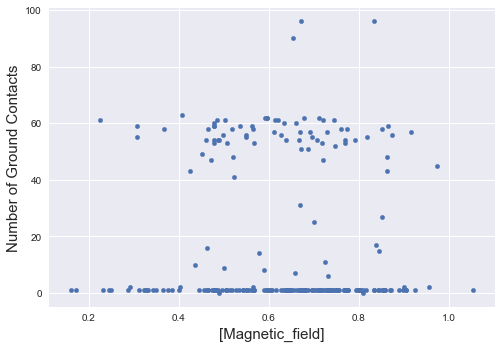

In [130]:
# reference: https://gmw.com/technicalnotes/magnetic-field-vectors/
df_reduced['Magnetic_field'] = df_reduced.apply(lambda row: 
                                            math.sqrt((row['Magnetic Field_x'] ** 2)+(row['Magnetic Field_y'] ** 2)+(row['Magnetic Field_z'] ** 2))
                                           , axis=1)
df_reduced.plot.scatter(y='Number of Ground Contacts', x=['Magnetic_field',])


In [131]:
df_reduced['Number of Ground Contacts_fix'] = df_reduced.apply(lambda row: (row['Number of Ground Contacts']>1), axis=1)
df_reduced.head(10)

,Sensor Noise Accelerometer,Sensor Noise Gyroscope,Sensor Noise Magnetometer,Sensor Noise Pressure,Rotor Orientation,Magnetic Field_x,Magnetic Field_y,Magnetic Field_z,Wind_x,Wind_y,...,Wind Deviation_x,Wind Deviation_y,Wind Deviation_z,Number of Iterations,Battery Consumption,Number of Ground Contacts,Wind_Speed,Battery Consumption_fix,Number of Ground Contacts_fix,Magnetic_field
0,0.074,0.012,0.002,0.152,+,0.319,0.463,0.644,1.2,1.2,...,2.7,0.4,6.5,883,0.183809,1,15.196381,0.168737,False,0.854907
1,0.044,0.050,0.001,0.726,+,0.180,0.421,0.198,16.7,11.5,...,2.8,1.7,2.7,155,0.251682,56,28.868322,0.224488,True,0.498844
2,0.094,0.026,0.000,0.311,+,0.313,0.361,0.356,19.1,16.2,...,7.6,1.3,7.7,875,0.406481,62,38.102231,0.341091,True,0.595841
3,0.078,0.090,0.009,0.575,+,0.016,0.638,0.083,1.2,6.0,...,3.9,7.1,6.0,855,0.181005,1,25.687935,0.166366,False,0.643575
4,0.084,0.072,0.008,0.340,+,0.187,0.069,0.529,17.8,11.7,...,6.5,6.0,3.8,795,0.183809,2,35.779044,0.168737,True,0.565306
5,0.099,0.065,0.008,0.181,x,0.063,0.223,0.201,14.9,15.3,...,8.3,5.8,8.3,837,0.404036,59,40.105486,0.339351,True,0.306756
6,0.057,0.088,0.008,0.425,+,0.613,0.156,0.366,9.1,14.1,...,1.7,1.2,9.0,748,0.158793,1,27.914512,0.147379,False,0.730795
7,0.094,0.028,0.006,0.344,x,0.399,0.194,0.625,5.0,14.4,...,2.0,9.8,6.5,892,0.185233,1,30.224659,0.169939,False,0.766461
8,0.063,0.017,0.003,0.583,x,0.316,0.377,0.282,7.0,19.5,...,1.2,2.5,4.8,884,0.380021,53,29.891303,0.322099,True,0.567018
9,0.064,0.076,0.009,0.573,x,0.586,0.172,0.620,11.4,14.2,...,8.1,3.9,9.9,888,0.186704,1,28.493859,0.171180,False,0.870276


In [132]:
# df_reduced['Number of Ground Contacts_fix']

In [133]:
df_reduced.corr(method='kendall')

,Sensor Noise Accelerometer,Sensor Noise Gyroscope,Sensor Noise Magnetometer,Sensor Noise Pressure,Magnetic Field_x,Magnetic Field_y,Magnetic Field_z,Wind_x,Wind_y,Wind_z,Wind Deviation_x,Wind Deviation_y,Wind Deviation_z,Number of Iterations,Battery Consumption,Number of Ground Contacts,Wind_Speed,Battery Consumption_fix,Number of Ground Contacts_fix,Magnetic_field
Sensor Noise Accelerometer,1.000000,0.001646,0.089742,-0.094555,-0.058875,0.080151,0.061832,0.009062,-0.002200,0.038419,0.027986,0.008711,0.029148,0.016198,-0.013985,0.014786,0.043480,-0.013985,0.026035,0.057498
Sensor Noise Gyroscope,0.001646,1.000000,0.131271,0.003017,0.042327,0.096137,-0.064566,-0.044038,-0.006455,-0.023779,0.035187,0.049312,0.069150,-0.080044,-0.006849,-0.008577,-0.012991,-0.006849,-0.008595,0.035070
Sensor Noise Magnetometer,0.089742,0.131271,1.000000,-0.024628,0.023686,0.050649,-0.015729,0.044049,0.078745,-0.059175,0.117891,0.057470,0.026649,-0.015203,0.040897,0.076233,0.066720,0.040897,0.099154,0.070584
Sensor Noise Pressure,-0.094555,0.003017,-0.024628,1.000000,0.065863,0.031485,-0.003524,0.048878,-0.017698,-0.054680,0.018519,-0.045913,-0.043253,-0.019352,0.053860,0.057127,-0.029465,0.053860,0.041123,0.077533
Magnetic Field_x,-0.058875,0.042327,0.023686,0.065863,1.000000,0.005236,-0.025221,0.019511,-0.046481,-0.068212,0.036976,0.029471,-0.023016,-0.037492,-0.042888,-0.037730,-0.050782,-0.042888,-0.051407,0.385823
Magnetic Field_y,0.080151,0.096137,0.050649,0.031485,0.005236,1.000000,-0.086097,-0.017541,-0.036485,-0.027136,0.025656,-0.008532,-0.000149,0.058246,0.013196,-0.003238,-0.045777,0.013196,-0.000054,0.359132
Magnetic Field_z,0.061832,-0.064566,-0.015729,-0.003524,-0.025221,-0.086097,1.000000,-0.095643,0.002155,-0.025729,-0.031137,0.030744,0.023169,0.006027,-0.022764,-0.028585,-0.034517,-0.022764,-0.001831,0.335381
Wind_x,0.009062,-0.044038,0.044049,0.048878,0.019511,-0.017541,-0.095643,1.000000,-0.012270,0.026934,0.059998,-0.024758,-0.010138,-0.094845,0.293654,0.363780,0.365206,0.293654,0.394980,-0.051366
Wind_y,-0.002200,-0.006455,0.078745,-0.017698,-0.046481,-0.036485,0.002155,-0.012270,1.000000,0.040836,-0.038374,0.007567,0.047060,0.083172,0.363152,0.346783,0.344936,0.363152,0.357931,-0.044595
Wind_z,0.038419,-0.023779,-0.059175,-0.054680,-0.068212,-0.027136,-0.025729,0.026934,0.040836,1.000000,0.064782,-0.070710,0.009432,-0.136602,0.048830,0.140453,0.385027,0.048830,0.161325,-0.068540


In [69]:
import statsmodels.api as sm
res = sm.OLS(df_reduced['Battery Consumption'], df_reduced[['Wind_Speed','Sensor Noise Pressure', 'Sensor Noise Gyroscope', 'Sensor Noise Accelerometer', 'Sensor Noise Magnetometer']])

In [110]:
df_reduced_fix = df_reduced[df_reduced['Number of Ground Contacts'] != 1]

In [137]:
t = 'Number of Ground Contacts'
res = sm.OLS(df_reduced[t], df_reduced['Magnetic_field'])
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Number of Ground Contacts   R-squared (uncentered):                   0.317
Model:                                   OLS   Adj. R-squared (uncentered):              0.314
Method:                        Least Squares   F-statistic:                              107.5
Date:                       Thu, 15 Aug 2019   Prob (F-statistic):                    6.08e-21
Time:                               14:54:23   Log-Likelihood:                         -1095.8
No. Observations:                        233   AIC:                                      2194.
Df Residuals:                            232   BIC:                                      2197.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Magnetic_field    27.9587      2.697     10.368      0.000      22.646      33.272
==============================================================================
Omnibus:                       39.645   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.594
Skew:                           0.890   Prob(JB):                     1.13e-08
Kurtosis:                       2.225   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

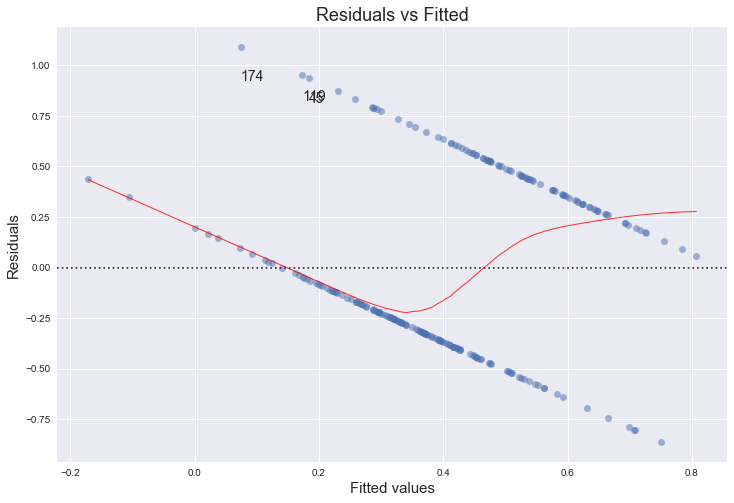

Residuals should be equally spread around a horizontal line without distinct patterns


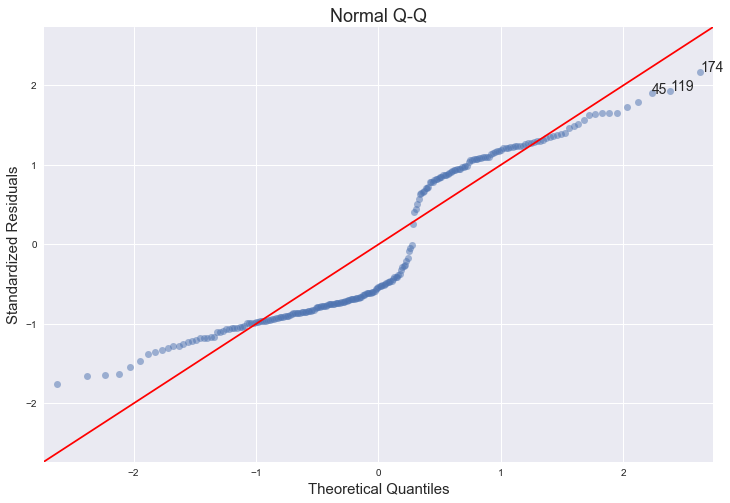

It’s good if residuals are lined well on the straight dashed line.


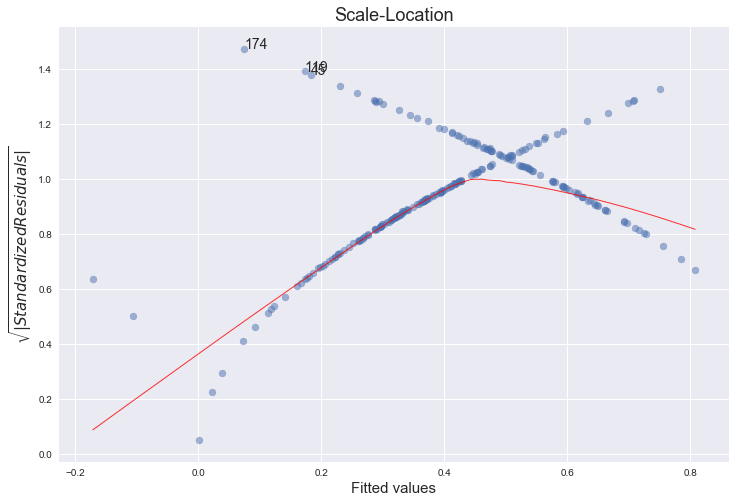

It’s good if you see a horizontal line with equally (randomly) spread points.


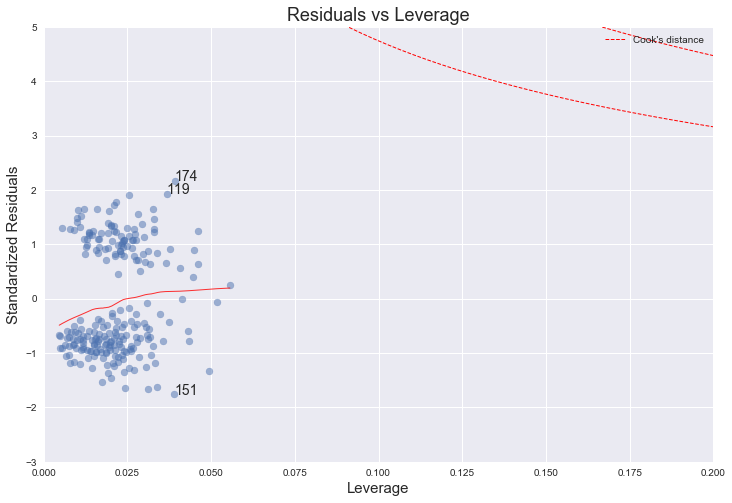

Look for cases outside of a dashed line, Cook’s distance.


In [122]:
plot(res.fit(), t, df_reduced, None)

In [74]:

def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

In [80]:
def plot(model_fit, t, data, fileName):
    
    # fitted values (need a constant term for intercept)
    model_fitted_y = model_fit.fittedvalues

    # model residuals
    model_residuals = model_fit.resid

    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal

    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

    # absolute residuals
    model_abs_resid = np.abs(model_residuals)

    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag

    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]
    
    
    ### RESIDUALS vs FITTED
    plot_lm_1 = plt.figure(1)
    plot_lm_1.set_figheight(8)
    plot_lm_1.set_figwidth(12)

    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, t, data=data, 
                              lowess=True, 
                              scatter_kws={'alpha': 0.5}, 
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]

    for i in abs_resid_top_3.index:
        plot_lm_1.axes[0].annotate(i, 
                                   xy=(model_fitted_y[i], 
    model_residuals[i]));    
    
    plt.show()
    print("Residuals should be equally spread around a horizontal line without distinct patterns")
#     plot_lm_1.savefig(fileName+"_residualsVsFitted.pdf")
    

    ####### QQ
    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.set_figheight(8)
    plot_lm_2.set_figwidth(12)

    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]

    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i, 
                                   xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
    model_norm_residuals[i]));
    
    plt.show()
    print("It’s good if residuals are lined well on the straight dashed line.")
#     plot_lm_2.savefig(fileName+"_qq.pdf")    
    
    ####### Scale-Location Plot
    plot_lm_3 = plt.figure(3)
    plot_lm_3.set_figheight(8)
    plot_lm_3.set_figwidth(12)

    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
                scatter=False, 
                ci=False, 
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
    
    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

    for i in abs_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i, 
                                   xy=(model_fitted_y[i], 
    model_norm_residuals_abs_sqrt[i]));

    plt.show()
    print("It’s good if you see a horizontal line with equally (randomly) spread points.")
#     plot_lm_3.savefig(fileName+"_scale-location.pdf")    
    
    ### Leverage
    plot_lm_4 = plt.figure(4)
    plot_lm_4.set_figheight(8)
    plot_lm_4.set_figwidth(12)

    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(model_leverage, model_norm_residuals, 
                scatter=False, 
                ci=False, 
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_4.axes[0].set_xlim(0, 0.20)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
    
    
    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i, 
                                   xy=(model_leverage[i], 
                                       model_norm_residuals[i]))

    # shenanigans for cook's distance contours

    p = len(model_fit.params) # number of model parameters

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50), 
          'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50)) # 1 line
    plt.legend(loc='upper right');
    
    plt.show()
    print("Look for cases outside of a dashed line, Cook’s distance.")
#     plot_lm_4.savefig(fileName+"_ResidualsVsLeverage.pdf")    

In [72]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Battery Consumption   R-squared (uncentered):                   0.896
Model:                             OLS   Adj. R-squared (uncentered):              0.896
Method:                  Least Squares   F-statistic:                              2000.
Date:                 Thu, 15 Aug 2019   Prob (F-statistic):                   4.91e-116
Time:                         12:11:33   Log-Likelihood:                          244.22
No. Observations:                  233   AIC:                                     -486.4
Df Residuals:                      232   BIC:                                     -483.0
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Wind_Speed     0.0087      0.000     44.721      0.000       0.008       0.009
==============================================================================
Omnibus:                       16.468   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.482
Skew:                           0.280   Prob(JB):                     7.26e-09
Kurtosis:                       4.883   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

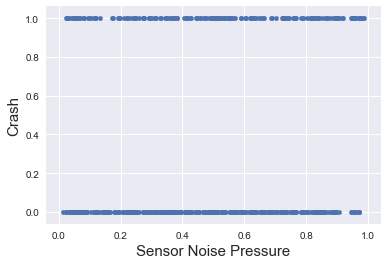

In [24]:
combined = pd.read_csv("/Users/jeaniechen/Desktop/CMU_REU/combined.csv")
combined['Wind_Speed'] = combined.apply(lambda row: 
                                            math.sqrt(((row.Wind_x+row['Wind Deviation_x']) ** 2)+((row.Wind_y+row['Wind Deviation_y']) ** 2)+((row.Wind_z+row['Wind Deviation_z']) ** 2))
                                           , axis=1)
combined.plot.scatter(x='Sensor Noise Pressure', y='Crash')


In [65]:
data = Orange.data.Table()